<a href="https://colab.research.google.com/github/Magvride/Spotify-Recommendations/blob/main/Ci%C3%AAncia_de_Dados_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação de pacotes necessários




##
  - **Numpy** - **computação numérica** em Python
 - **Pandas** - Manipulação e **análise de dados**
 - **SciPy**- Escossistema para matemática, ciência e engenharia
 - **Matplotlib** - **Visualizações** em Python
 - **Seaborn** - Visualização estatística



In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento do Dataset


In [ ]:
#Carregar o dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df = pd.read_csv(url)

In [ ]:
#Imprimir primeiras linhas do dataset
print(df.head())

In [6]:
#Informações geral do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

#Resumo estatístico do dataset

In [7]:
print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

#Medidas de tendencia central




## **Moda** para variables categoricas

In [8]:
#Criação de uma lista com as columnas que quermos saber as medidas de tendencia central
#Se seleccionaron las variables que hacian mas sentido conocer la T.C
features = ['track_name', 'track_artist', 'playlist_genre', 'track_album_name']

###Um jeito de conhecer a moda de diferentes variaveis **.mode()**

In [26]:
for feature in features:
  moda_val = df[feature].mode()[0]
  print()
  print(f"A moda do atributo {feature} é {moda_val}")


A moda do atributo track_name é Poison

A moda do atributo track_artist é Martin Garrix

A moda do atributo playlist_genre é edm

A moda do atributo track_album_name é Greatest Hits


###Jeito de conhecer a moda com função **.value_counts()**

In [21]:
print(df["track_name"].value_counts().idxmax())
print(df['track_name'].value_counts().max())

Poison
22


##**Mediana** e **media** para variaveis numericas

In [30]:
featuresNumericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for featureNumerica in featuresNumericas:
  media_val= df[featureNumerica].median()
  print()
  print(f"A media de {featureNumerica} é {media_val}")
  mediana_val = df[featureNumerica].mean()
  print(f"A mediana de {featureNumerica} é {mediana_val}")



A media de danceability é 0.672
A mediana de danceability é 0.6548495202996985

A media de energy é 0.721
A mediana de energy é 0.6986192707032558

A media de key é 6.0
A mediana de key é 5.374470806810222

A media de loudness é -6.166
A mediana de loudness é -6.719499131970883

A media de mode é 1.0
A mediana de mode é 0.5657113270185484

A media de speechiness é 0.0625
A mediana de speechiness é 0.10706806871135749

A media de acousticness é 0.0804
A mediana de acousticness é 0.1753337150793409

A media de instrumentalness é 1.61e-05
A mediana de instrumentalness é 0.08474716133310999

A media de liveness é 0.127
A mediana de liveness é 0.19017619529132274

A media de valence é 0.512
A mediana de valence é 0.5105609737154692

A media de tempo é 121.984
A mediana de tempo é 120.88113154448268

A media de duration_ms é 216000.0
A mediana de duration_ms é 225799.811622453


##**Graficos de tendencia central**


TypeError: 'value' must be an instance of str or bytes, not a float

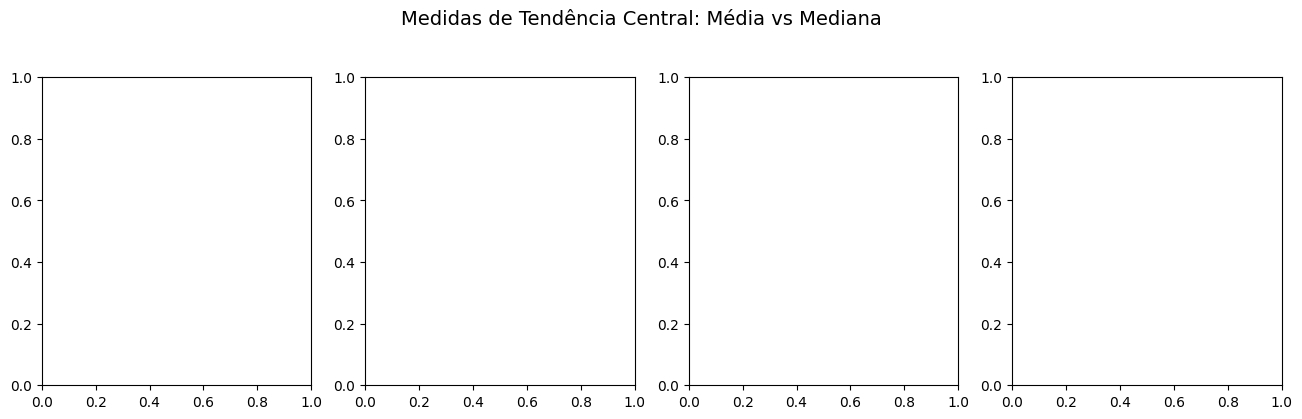

In [52]:
featuresNumericas1 = ['liveness', 'valence', 'tempo', 'duration_ms']
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Medidas de Tendência Central: Média vs Mediana', fontsize=14, y=1.05)

for idx, feature in enumerate(featuresNumericas1):
    ax = axes[idx]
    # Histograma
    ax.hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
